1 문제 - 데이터 소개

1.1 신용카드 부정 사용자 검출

1.4 데이터 개요

2 데이터 읽고 관찰하기

2.1 데이터 읽기

In [1]:
import pandas as pd

# data_path ="/home/kang/dev_ws/EDA/data/creditcard.csv"
data_path ="../../EDA/data/creditcard.csv"
raw_data = pd.read_csv(data_path)
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


2.2 특성

In [2]:
raw_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

데이터의 특성은 여러 이유로 이름이 감춰져 있다.

2.3 데이터 라벨의 불균형이 정말 심하다

In [3]:
raw_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

2.3 데이터 라벨의 불균형이 정말 심하다

In [4]:
frauds_rate = round(raw_data['Class'].value_counts()[1]/len(raw_data)*100,2)
print('Frauds', frauds_rate, '% of the datast')

Frauds 0.17 % of the datast


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


2.4 그래프로 표현되기도 힘들다

/home/kang/venv/machine_running/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kang/venv/machine_running/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kang/venv/machine_running/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


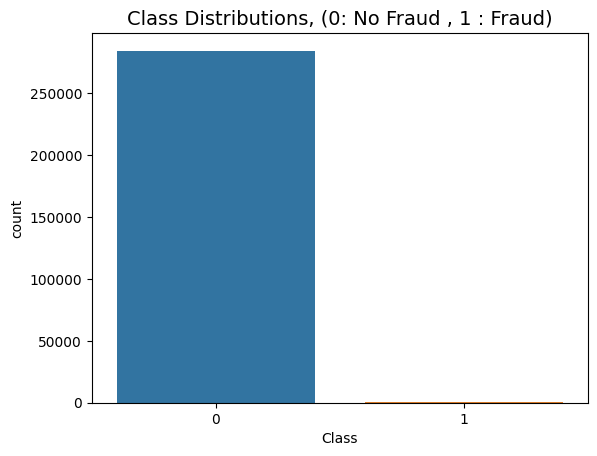

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data = raw_data)
plt.title('Class Distributions, (0: No Fraud , 1 : Fraud)', fontsize = 14)
plt.show()

2.5 일단 X, y로 데이터 선정

In [7]:
X = raw_data.iloc[:, 1:-1]
y = raw_data.iloc [:, -1]

X.shape, y.shape


((284807, 29), (284807,))

2.6 데이터를 나누고

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
train_test_split(X,y, test_size =0.3, random_state=13, stratify=y)

2.7 나눈 데이터의 불균형 정도가 어떤 지 확인해보자

In [9]:
import numpy as np

np.unique(y_train, return_counts = True)

(array([0, 1]), array([199020,    344]))

In [10]:
tmp = np.unique(y_train, return_counts =True)[1]
tmp[1]/len(y_train) * 100

0.17254870488152324

In [11]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([85295,   148]))

In [12]:
tmp = np.unique(y_test, return_counts=True)[1]
tmp[1]/len(y_test)*100

0.17321489179921118

3 단순 무식한 첫 도전 - 1st Trial
3.1 먼저 분류기의 성능을 return하는 함수 하나 작성

In [13]:
from sklearn.metrics import(accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score)
def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc =roc_auc_score(y_test,pred)

    return acc, pre, re, f1, auc

이런 식으로 함수화 해두면 나중에 따로 사용하도록 해둘 수 있다.

3.2 또 성능을 출력하는 함수 하나 작성

In [14]:
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)

    print('==> confusion matrix')
    print(confusion)
    print('==========')

    print('Accuracy: {0:.4f}, precision: {1:4f}'.format(acc,pre))
    print('Recall:{0:.4f}, F1:{1:4f}, Auc:{2:.4f}'.format(re, f1, auc))

3.3 Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state =13, solver = 'liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print_clf_eval(y_test, lr_pred)

==> confusion matrix
[[85284    11]
 [   60    88]]
Accuracy: 0.9992, precision: 0.888889
Recall:0.5946, F1:0.712551, Auc:0.7972


3.4 Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth =4)
dt_clf.fit(X_train,  y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)



==> confusion matrix
[[85281    14]
 [   42   106]]
Accuracy: 0.9993, precision: 0.883333
Recall:0.7162, F1:0.791045, Auc:0.8580


3.5 Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs = -1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

==> confusion matrix
[[85290     5]
 [   38   110]]
Accuracy: 0.9995, precision: 0.956522
Recall:0.7432, F1:0.836502, Auc:0.8716


3.6 LightGBM  안배워서 생략


3.7 여기서 Recall과 Precision의 의미는
은행 입장에서는 Recall이 좋을 것이다.
사용자 입장에서는 Precision이 좋겠지.
왜?

#### 4 한걸음 전진~
#### 4.1 모델과 데이터를 주면 성능을 출력하는 함수를 하나 만들자

In [18]:
def get_result(model, X_train, y_train, X_test ,y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    return get_clf_eval(y_test, pred)

4.2 다수의 모델의 성능을 정리해서 DataFrame으로 반환하는 함수 작
성

In [19]:
def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    tmp = []

    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))

    return pd.DataFrame(tmp, columns=col_names, index = model_names)

4.3 4개의 분류 모델을 한 번에 표로 정리해보자

In [20]:
import time
models = [lr_clf, dt_clf, rf_clf]
model_names =['LinerReg.', 'DecisionTree', 'RandomForest']

start_time = time.time()
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time : ', time.time() - start_time)
results

Fit time :  36.65899157524109


,accuracy,precision,recall,f1,roc_auc
LinerReg.,0.999169,0.888889,0.594595,0.712551,0.797233
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592


4.4 확실히 앙상블 계열의 성능이 우수하다

log 스케일 특성 = 큰변화를 둔감하게 만들어준다.

# 5 데이터를 정리해서 다시 도전하자 - 2nd Trial
##### 5.1 raw_data의 Amount 컬럼 확인
##### 5.2 컬럼의 분포가 특정 대역이 아주 많다

/tmp/ipykernel_19318/2207418496.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data['Amount'], color = 'r')
/home/kang/venv/machine_running/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kang/venv/machine_running/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('m

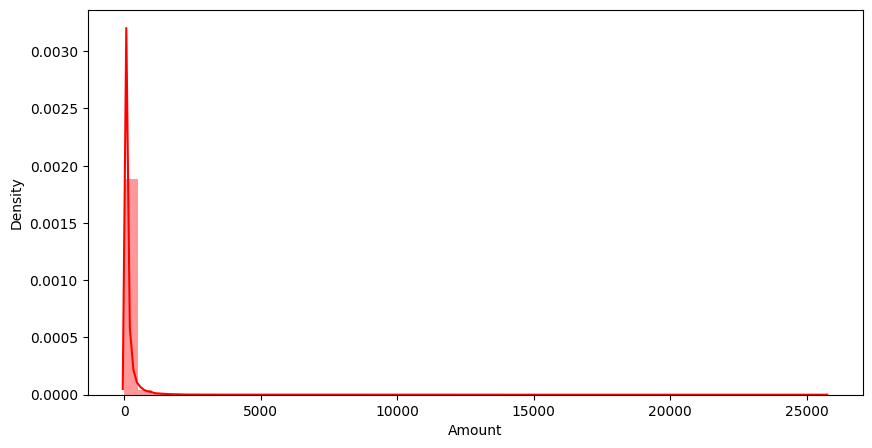

In [21]:
plt.figure(figsize =(10,5))
sns.distplot(raw_data['Amount'], color = 'r')
plt.show()
#Amount는 신용카드 사용금액

5.3 Amount 컬럼에 StandardScaler 적용

StandardScaler = 값을 1과 0 사이에 유지시켜 주는 것

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
amount_n = scaler.fit_transform(raw_data['Amount'].values.reshape(-1,1))

raw_data_copy = raw_data.iloc[:,1:-2]
raw_data_copy['Amount_Scaled'] = amount_n
raw_data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


5.4 데이터를 다시 나누고

In [23]:
X_train, X_test, y_train, y_test =\
    train_test_split(raw_data_copy, y, test_size = 0.3,
        random_state =13, stratify =y)

5.5 모델에 다시 평가를 해보면

In [24]:
models = [lr_clf, dt_clf, rf_clf]
model_names = ['LinerReg','DecisionTree','RandomForest']

start_time = time.time()
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time : ', time.time() - start_time)
results



Fit time :  31.875484228134155


,accuracy,precision,recall,f1,roc_auc
LinerReg,0.999169,0.888889,0.594595,0.712551,0.797233
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592


5.7 모델별 ROC 커브

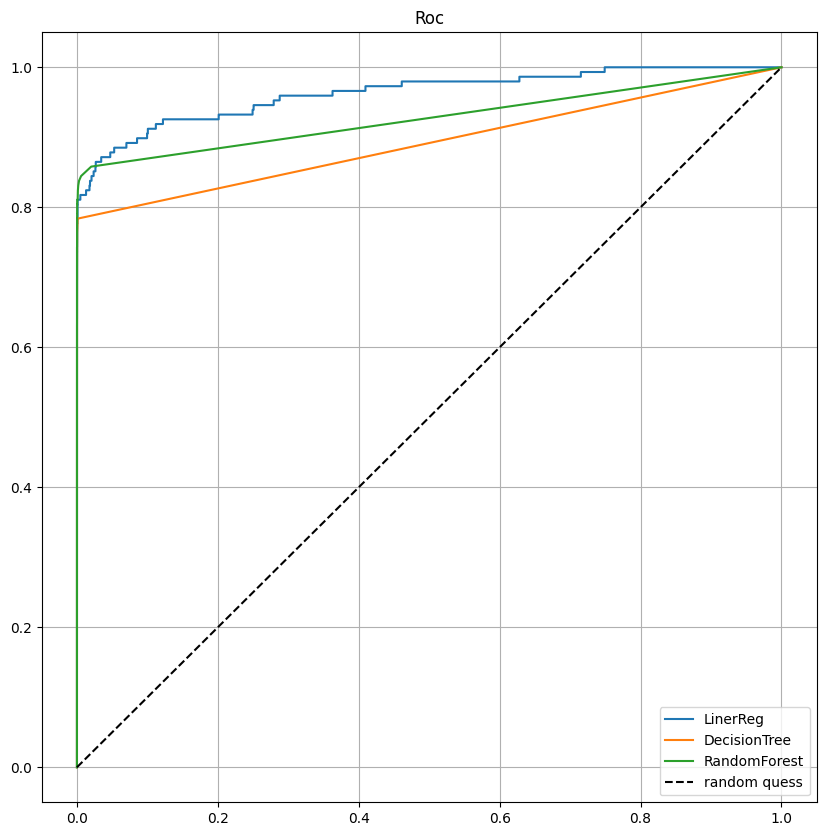

In [25]:
from sklearn.metrics import roc_curve

def draw_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize=(10,10))

    for model in range(len(models)):

        pred = models[model].predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label = model_names[model])
        
    plt.plot([0,1], [0,1], 'k--', label ='random quess')
    plt.title('Roc')
    plt.legend()
    plt.grid()
    plt.show()

draw_roc_curve(models, model_names, X_test, y_test)



5.9 또다른 시도 log scale

In [26]:
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [27]:
raw_data['Amount'].values

array([149.62,   2.69, 378.66, ...,  67.88,  10.  , 217.  ])

In [28]:
import numpy as np
np.log1p(1)

0.6931471805599453

In [29]:
amount_log = np.log1p(raw_data['Amount'].values)

raw_data_copy['Amount_Scaled']= amount_log
raw_data_copy.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539


5.10 분포가 변화함

/home/kang/venv/machine_running/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kang/venv/machine_running/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x500 with 0 Axes>

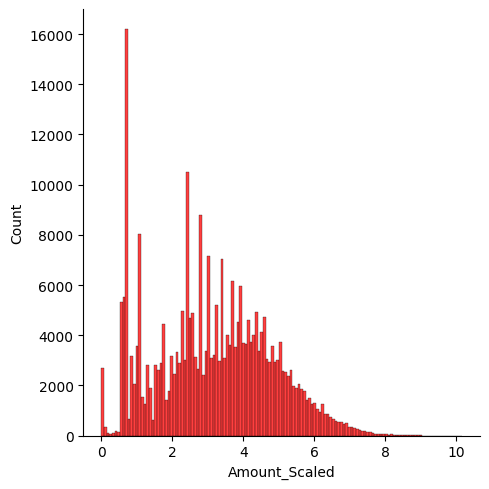

In [30]:
plt.figure(figsize =(10,5))
sns.displot(raw_data_copy['Amount_Scaled'], color ='r')

plt.show()

5.11 다시 성능을 확인해보자

In [31]:
X_train, X_test, y_train, y_test =\
train_test_split(raw_data_copy, y, test_size=0.3,random_state=13, stratify =y)

start_time = time.time()
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time : ', time.time() - start_time)
results

Fit time :  32.87085151672363


,accuracy,precision,recall,f1,roc_auc
LinerReg,0.999157,0.887755,0.587838,0.707317,0.793854
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592


5.12 결과

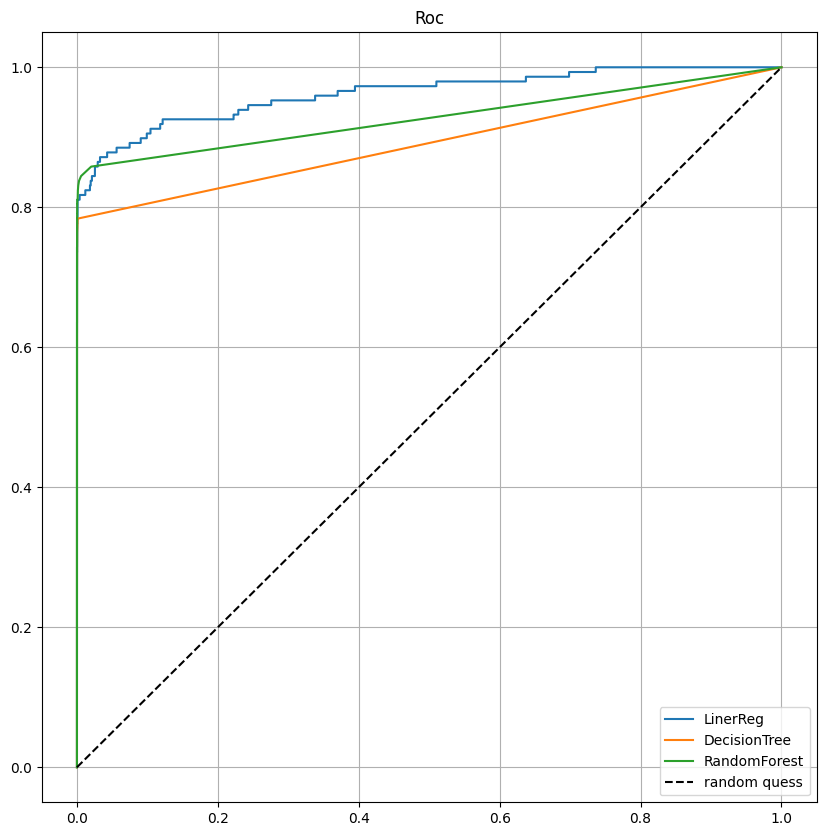

In [32]:
draw_roc_curve(models, model_names, X_test, y_test)

6 다시 데이터의 Outlier를 정리해보자 - 3rd Trial
##### 6.1 특이 데이터

/home/kang/venv/machine_running/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kang/venv/machine_running/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kang/venv/machine_running/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

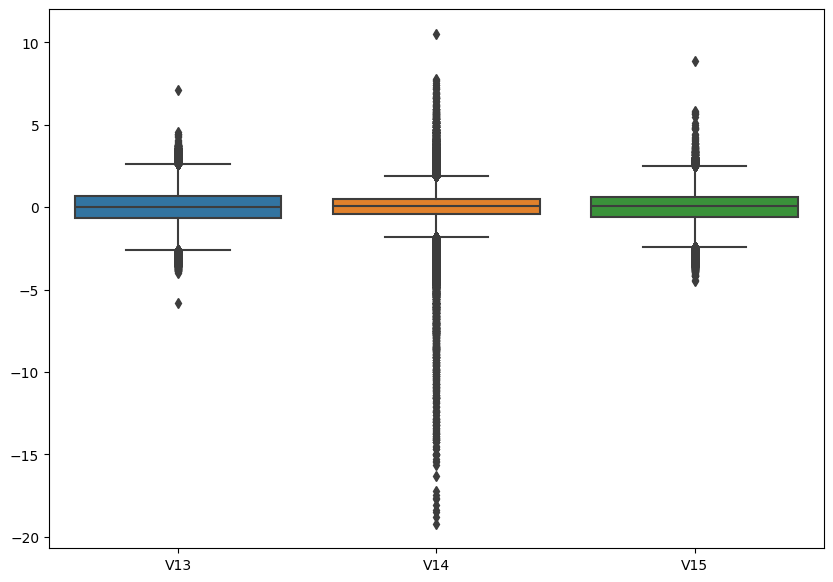

In [33]:
import seaborn as sns

plt.figure(figsize=(10,7))
sns.boxplot(data = raw_data[['V13','V14','V15']])


6.2 Outlier를 정리하기 위해 Outlier의 인덱스를 파악하는 코드

In [38]:
def get_outlier(df=None, column=None, weight =1.5):
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val)|(fraud > highest_val)].index

    return outlier_index


#--> | = or이라는 뜻이다.

6.3 Outlier 찾기

In [39]:
get_outlier(df=raw_data, column='V14', weight = 1.5)

Index([8296, 8615, 9035, 9252], dtype='int64')

test data 는 증감 감소하면 안된다 train 데이터를 이용하여 써야한다.

6.4 Outlier 제거

In [40]:
raw_data_copy.shape

(284807, 29)

In [41]:
outlier_index = get_outlier(df=raw_data, column='V14', weight=1.5)
raw_data_copy.drop(outlier_index, axis = 0, inplace= True)
raw_data_copy.shape

(284803, 29)

6.5 Outlier를 제거하고 데이터 나누기

In [ ]:
X = raw_data_copy

raw_data.drop(outlier_index, axis = 0, inplace= True)
y= raw_data.iloc

6.6 다시~

In [42]:
models =[lr_clf, dt_clf, rf_clf]
model_names = ['LinearReg', 'DecisionTree', 'RandomForest']

srart_time = time.time()
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time : ', time.time() - start_time)
results

Fit time :  519.9546802043915


,accuracy,precision,recall,f1,roc_auc
LinearReg,0.999157,0.887755,0.587838,0.707317,0.793854
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592


6.8 ROC 커브

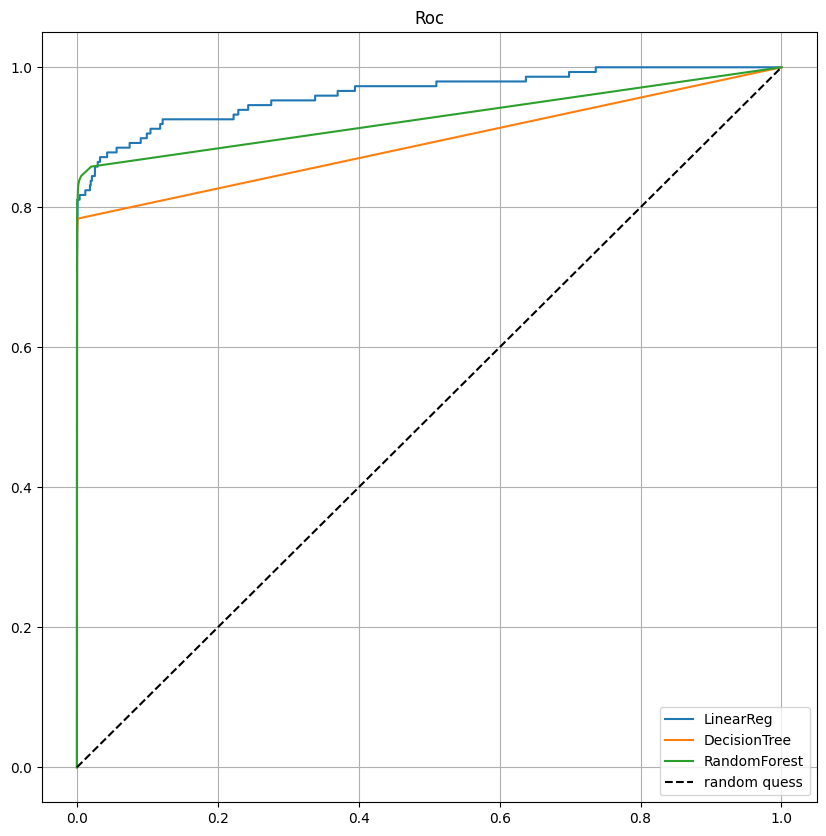

In [43]:
draw_roc_curve(models, model_names, X_test, y_test)

7 SMOTE Oversampling - 4th Trial

7.1 Undersampling vs Oversampling

데이터의 불균형이 극심할 때 불균형한 두 클래스의 분포를 강제로 맞춰보는 작업

언더샘플링 : 많은 수의 데이터를 적은 수의 데이터로 강제로 조정

오버샘플링 : 원본데이터의 피처 값들을 아주 약간 변경하여 증식
 
대표적으로 SMOTE(Synthetic Minority Over-sampling Technique) 방법이 있음

적은 데이터 세트에 있는 개별 데이터를 k-최근접이웃 방법으로 찾아서

데이터의 분포 사이에 새로운 데이터를 만드는 방식

imbalanced-learn 이라는 Python pkg가 있음

7.2 imbalanced-learn 설치

In [44]:
pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 KB 7.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


7.3 SMOTE 적용

In [48]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

7.4 데이터 증강 효과는

In [49]:
X_train.shape, y_train.shape

((199364, 29), (199364,))

In [50]:
X_train_over.shape, y_train_over.shape

((398040, 29), (398040,))

7.5 결과는?

In [51]:
print(np.unique(y_train, return_counts =True))
print(np.unique(y_train_over, return_counts= True))

(array([0, 1]), array([199020,    344]))
(array([0, 1]), array([199020, 199020]))


7.6 다시 학습을 돌려보자

In [52]:
models =[lr_clf, dt_clf, rf_clf]
model_names = ['LinearReg', 'DecisionTree', 'RandomForest']

srart_time = time.time()
results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

print('Fit time : ', time.time() - start_time)
results

Fit time :  986.3977336883545


,accuracy,precision,recall,f1,roc_auc
LinearReg,0.999157,0.887755,0.587838,0.707317,0.793854
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592


7.7 조금 오래 걸린다

7.8 ROC 커브

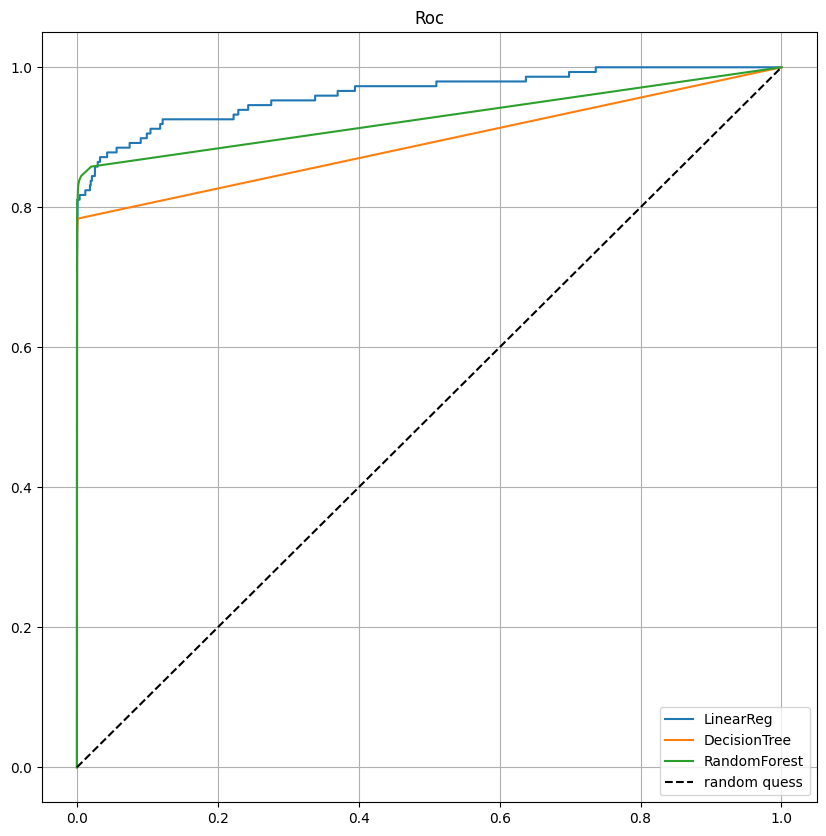

In [53]:
draw_roc_curve(models, model_names, X_test, y_test)